# <center> Getting Multiple Graphs using a function </center>
#### <center>Vighnesh Tamse D19037</center><center>Anusha Gajinkar D19008</center>

***In the below code we are defining a function called 'graph' which will identify the type of data to plot bar graph for categorical data and boxplot and histogram for continous datatype.***

***In this function we can pass four arguments of which the 'filename' that is datafile name is a mandatory argument and other are default arguments.***

***If columns name for which we want plot is not specified in 'columns' argument than the function will plot for all columns in data file.***

***If 'directory' is not specified it will read and write in current directory.***

***If plot figure size is not specified it will take default 'figsize=(8,7)'.***

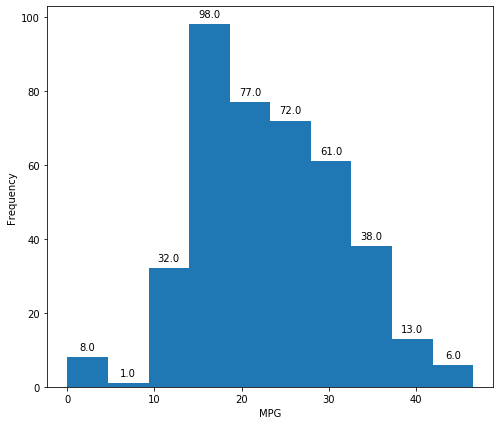

<Figure size 576x504 with 0 Axes>

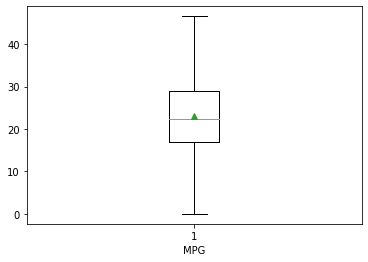

<Figure size 432x288 with 0 Axes>

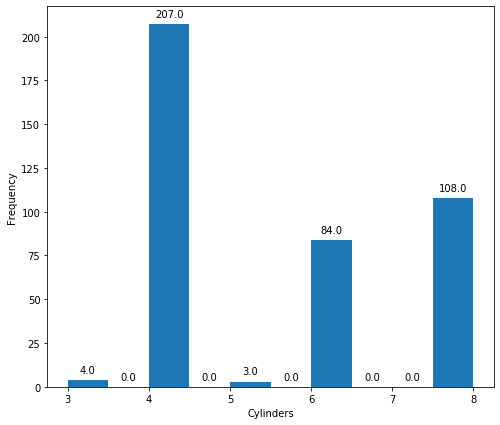

<Figure size 576x504 with 0 Axes>

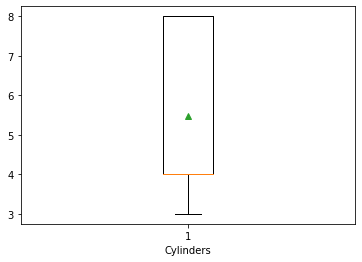

<Figure size 432x288 with 0 Axes>

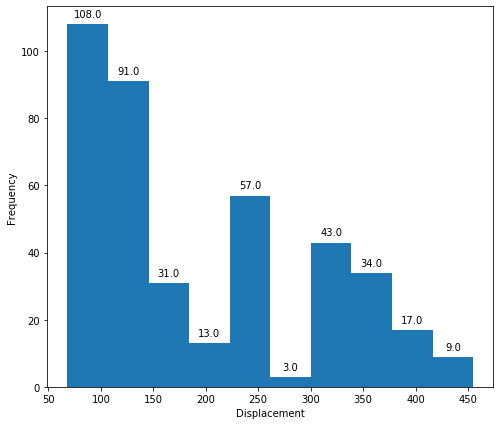

<Figure size 576x504 with 0 Axes>

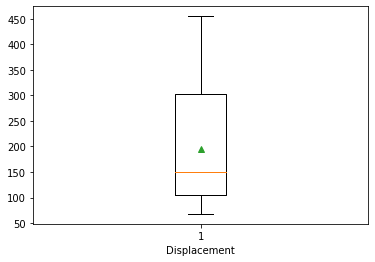

<Figure size 432x288 with 0 Axes>

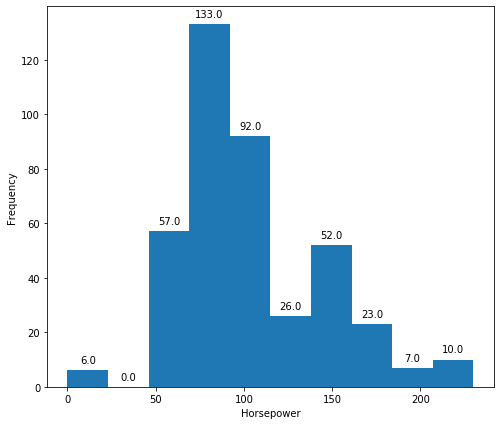

<Figure size 576x504 with 0 Axes>

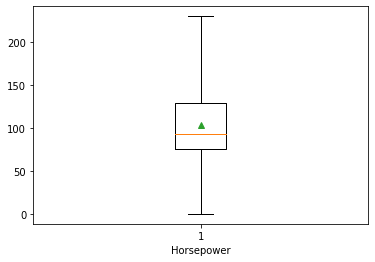

<Figure size 432x288 with 0 Axes>

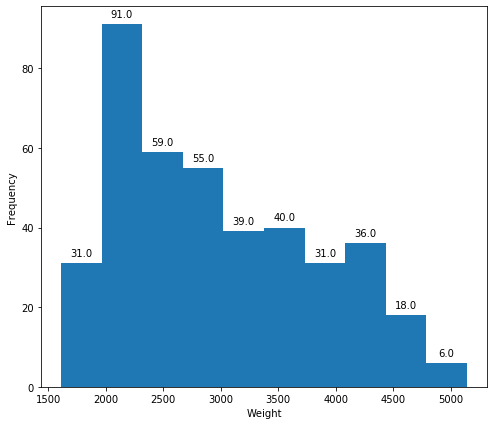

<Figure size 576x504 with 0 Axes>

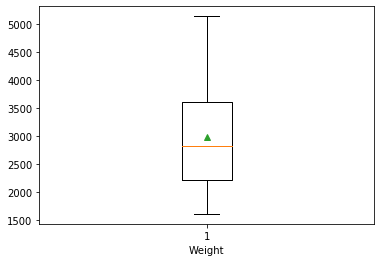

<Figure size 432x288 with 0 Axes>

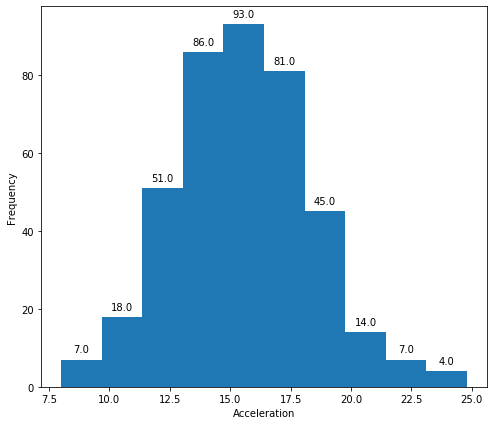

<Figure size 576x504 with 0 Axes>

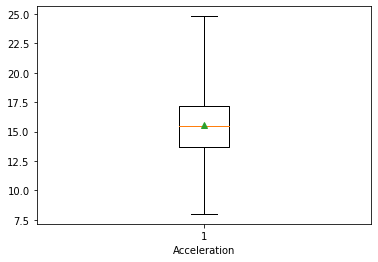

<Figure size 432x288 with 0 Axes>

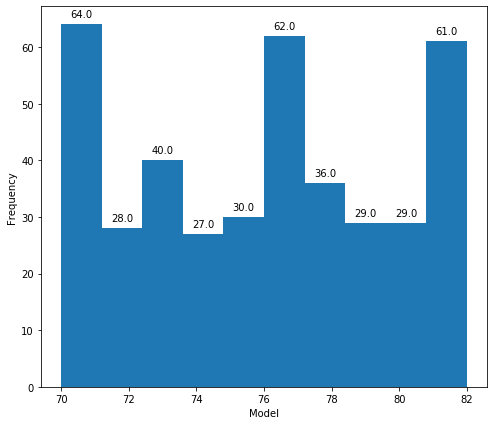

<Figure size 576x504 with 0 Axes>

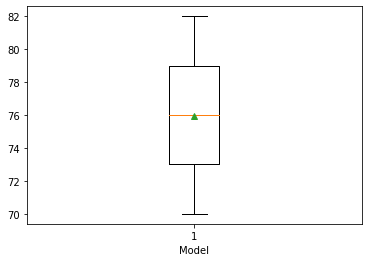

<Figure size 432x288 with 0 Axes>

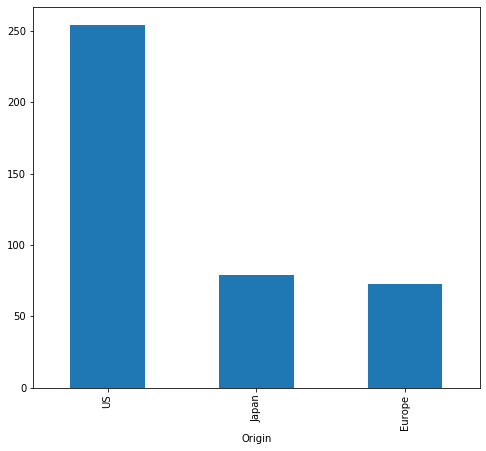

<Figure size 432x288 with 0 Axes>

The graphs have been generated in the location:  C:\Users\Vighnesh Tamse\Desktop\Jupyter Notebook\Python\Graph_Results


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil as sh
def graph(data_file,column=None,directory=None,figsize=(8,7),folder=None):
    
     #Suppose no directory is mentioned by the user, then we get the current working directory
    if directory==None:
        directory = os.getcwd()
    
    #extracting the file name
    f_name = data_file[:data_file.find('.')]
    
    #extracting the file extension type
    f_type = data_file[data_file.find('.')+1:]
    
    #Reading the file by using pd.read function from pandas which we pass as string into the read_file variable
    if f_type == 'xlsx' or f_type == 'xls':  #pandas do not have xlsx as file extension.
        f_type = 'excel'  #So if we encounter xlsx we change ext name to excel
        
    read_file = "pd.read_"+f_type
    
    #Using the read_file variable to read the file and extract all the data into a dataframe variable
    data = eval(read_file)(data_file)

    #directory = os.getcwd()                    #Initiazing the directory to current directory
    if folder == None:
        folder = 'Graph_Results'                    #Giving name to a folder if user does not provide folder name
        
    if folder in os.listdir(directory):
        sh.rmtree(directory+'\\'+folder)        #Suppose the folder is already present, remove it and make new folder
        
    if data_file in os.listdir(directory):    #Suppose the file name provided is in current directory
        os.mkdir(directory+'\\'+folder)       #Make a new folder in the same directory
    else:
        #shutil.rmtree is used to remove non empty directories. os.rmdir can remove only empty directories
        sh.rmtree(directory+'\\'+folder)        #Suppose the folder is already present, remove it and make new folder
        os.mkdir(directory+'\\'+folder)
    
    os.chdir(directory+'\\'+folder)  #changing the directory to save graphs
    
    col = []
    if column==None:
        col = list(data.columns)#If column names are not provided, take all columns from the dataset
    
    elif type(column) is str:
        col.append(column)      #If column is provided as string by the user, consider only that colummn
        
    elif type(column) is list:
        for c in column:
            col.append(c)       #If columns are provided by the user in the form of list consider only those columns
    
    for i in col:
        #checking for unique values
        l=len(i)
        if l < 500:
            tol=0.05*l
        else:
            tol=25 #for large data unique()<5% of rows will also be large, in that case we can specify like 20 unique value as threshold
        
        if (data[i].dtype=="object") or len(data[i].unique())<tol:#This condition will help to identify categorical variables in the data
            plt.figure(figsize=figsize)
            ax=data[i].value_counts().plot(kind='bar')
            plt.xlabel(i)
            plt.show()
            plt.clf()
            rects=ax.patches #matplotlib has objects that represent many common shapes, referred as patches
            for rect in ax.patches: #Here rect is one rectange shape of the plot
                y_value = rect.get_height()
                x_value = rect.get_x() + rect.get_width() / 2 #Here rect.get_x() method will get the x coordinate of thet x. x_value will give midposition of that rectangle at x-axis
                space = 5
                va = 'bottom'
                if y_value < 0:
                    space *= -1
                    va = 'top' #this will help to display the data values at top of eac bar
                label = "{:.1f}".format(y_value) #this is the format the data labels to one decimal point
                ax.annotate(label,(x_value, y_value),xytext=(0, space), textcoords="offset points",ha='center',va=va) #annotate() method will place text at an arbitrary position on the Axes
            plt.savefig('Barplot of '+i+'.png') #will save the plot in the the directory which we passed as an argument with file name 'columnname_bar'
            plt.show()
            plt.clf()
        else:
            plt.figure(figsize=figsize) #will create new figure for each column
            ax=data[i].plot(kind='hist')
            rects=ax.patches 
            for rect in ax.patches: 
                y_value = rect.get_height()
                x_value = rect.get_x() + rect.get_width() / 2
                space = 5
                va = 'bottom'
                if y_value < 0:
                    space *= -1
                    va = 'top' 
                label = "{:.1f}".format(y_value) 
                ax.annotate(label,(x_value, y_value),xytext=(0, space), textcoords="offset points",ha='center',va=va) 
            plt.xlabel(i)
            plt.savefig('Histogram of '+i+'.png')  #saving histogram to the specified folder
            plt.figure(figsize=figsize) 
            plt.show()
            plt.clf()
            #data[i].plot(kind='box')
            plt.boxplot(data[i], showmeans=True, whis = 99)  #Gives boxplot showing the mean value on the graph
            plt.xlabel(i)
            plt.show()
            plt.clf()
            plt.savefig('Boxplot of '+i+'.png')
    
    #Informing the user that graphs have been generated in the specified folder
    print('The graphs have been generated in the location: ',os.getcwd())
    
    #Coming back to the main directory
    os.chdir('..')
            
#driver code
graph('cars.csv',directory='C:\\Users\\Vighnesh Tamse\\Desktop\\Jupyter Notebook\\Python')

***In the above code we have done following improvizations:***

***1. The function can accept any file extension types such as csv, excel etc.***

***2. The bar and histogram show the data labels.***

***3. We can pass figure size as argument.***

***4. While saving graphs we have name the graph with its column name and type of graph.***

***5. We have also included one extra argument of taking folder name from user. If user does not provide folder name, by default it will be 'Graph_Results'.***

***Also we will find that if you pass the same path and pass different values of other arguments, the latest result will overwrite the existing one.***